# Fourier Analysis of Real World Data

Fourier analysis can be applied to any time series.  Here we will look at the
daily closing price of the S&P 500 over the last ten years.  The data is available
from [St. Louis Fed](https://fred.stlouisfed.org/series/SP500).

The data is stored in a CSV file, which we can read using the `pandas` library.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Read the data from the CSV file.
data = pd.read_csv('SP500.csv',parse_dates=True)

# Print the first few rows.
data.head()

,DATE,SP500
0,2014-01-21,1843.80
1,2014-01-22,1844.86
2,2014-01-23,1828.46
3,2014-01-24,1790.29
4,2014-01-27,1781.56


In [25]:
# Clean up the data.
data = data.dropna()

# Remove rows with no closing price.
data = data[data['SP500'] != '.']

# Convert the closing price to a float.
data['SP500'] = data['SP500'].astype(float)

# Convert the date to a datetime object.
data['DATE'] = pd.to_datetime(data['DATE'])

# Extract the closing price and date.
closing = data['SP500']
date = data['DATE']

# Print the first few rows.
data.head()

# Convert the closing price to a numpy array.
closing = np.array(closing)

# Convert the date to a number of days since the first date.
startdate = date.loc[0]
date = (date - startdate).dt.days

print(len(date))
print(len(closing))

2517
2517


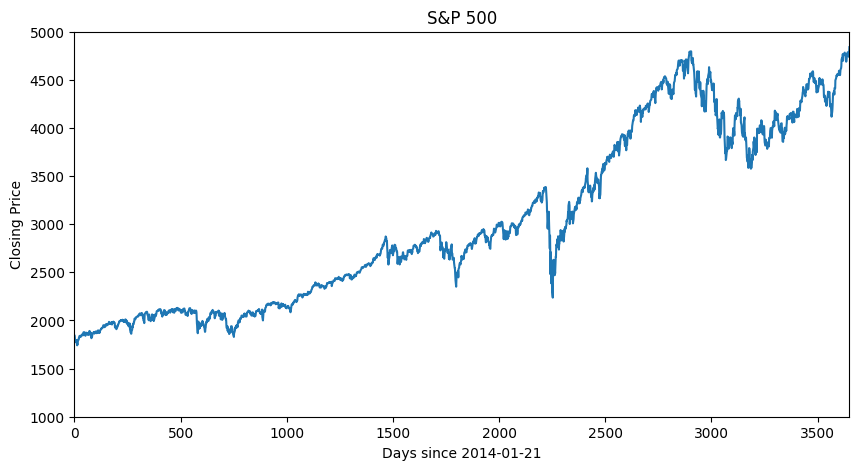

In [26]:
# Plot the closing price.
plt.figure(figsize=(10,5))
plt.plot(date,closing)
plt.xlabel('Days since ' + str(startdate.date()))
plt.ylabel('Closing Price')
plt.title('S&P 500')
plt.xlim(0,3650)
plt.ylim(1000,5000)
plt.show()


Interesting Frequencies:
Week: 0.14246575342465753
Month: 0.03287671232876712
1/2 year: 0.005479452054794521
1 year: 0.0027397260273972603
Nyquist frequency = 1258.5


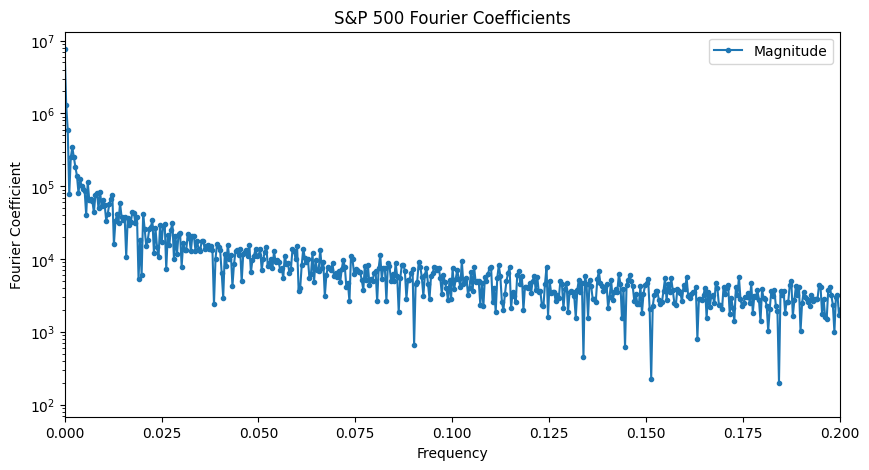

In [27]:
# Calculate the Fourier coefficients.

print("Interesting Frequencies:")
print("Week:",52/(365))
print("Month:",12/(365))
print("1/2 year:",2/(365))
print("1 year:",1/365)

# Calculate the Nyquist frequency.
nyquist = 0.5 * len(closing)
print('Nyquist frequency =',nyquist)

# Number of Fourier coefficients to calculate.
N = 1258

# Calculate the Fourier coefficients.
coeff = np.fft.fft(closing)[:N]

# Calculate the frequencies.
freq = np.fft.fftfreq(len(closing))[:N]

# Plot the Fourier coefficients.
plt.figure(figsize=(10,5))
#plt.plot(freq,coeff.real,label='Real')
#plt.plot(freq,coeff.imag,label='Imaginary')
plt.plot(freq,np.abs(coeff),'.-',label='Magnitude')
plt.xlabel('Frequency')
plt.ylabel('Fourier Coefficient')
plt.title('S&P 500 Fourier Coefficients')
plt.xlim(0,0.2)
plt.yscale('log')
plt.legend()